![h&mBanner.jpeg](attachment:h&mBanner.jpeg)

# Data Preparation

In [ ]:
!pip install surprise

     -------------------------------------- 772.0/772.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-win_amd64.whl size=1089317 sha256=a6364fb3c7ce8ebde6b560d49333a6b030fb5c2195e949b297d0e8e364824288
  Stored in directory: c:\users\ssune\appdata\local\pip\cache\wheels\c6\3a\46\9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, GridSearchCV, train_test_split
from surprise.prediction_algorithms import SVD, SVDpp, NMF, BaselineOnly, NormalPredictor, KNNBasic

# from sklearn.model_selection import train_test_split

plt.style.use('fast')
%matplotlib inline

In [ ]:
df =  pd.read_csv("transactions_train.csv",
                           encoding="ISO-8859-1", header=0)

In [ ]:
df['Bought'] = 1
import datetime  
df["t_dat"]=pd.to_datetime(df["t_dat"])
df['pop_factor'] = df['t_dat'].apply(lambda x:1/(datetime.datetime(2020,12,31)-x).days)
#pop_factor==rating
#

In [ ]:
#df.to_csv("transactionsPopFactor", encoding='ISO-8859-1', header='true')


NameError: name 'df' is not defined

In [ ]:
transactions=df

In [ ]:
pd.set_option('display.max_columns', 50)

Read in the `out` file which is the data prepared for the collaborative modeling in the `FinalDataPreparation` notebook.

In [ ]:
#transactions = pd.read_csv("transactionsPopFactor.csv",
    #"//apporto.com/dfs/CLT/Users/ssreedh1_uncc/Desktop/transactions_train/transactions_train.csv",
                           encoding="ISO-8859-1", header=0)
#transactions.head(10)

,Unnamed: 0,customer_id,article_id,pop_factor,t_dat
0,13129245,0000b7a134c3ec0d8842fad1fd4ca28517424c14fc4848...,745477001,0.001825,2019-07-02
1,13129246,0000b7a134c3ec0d8842fad1fd4ca28517424c14fc4848...,651300005,0.001825,2019-07-02
2,13129247,000f4d22ea7b4fc94704b3e6b7fb225b4f9dde7560cd38...,745475001,0.001825,2019-07-02


In [ ]:
transactions.tail(10)

,t_dat,customer_id,article_id,price,sales_channel_id,Bought,pop_factor
31788314,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,701472004,0.010153,2,1,0.01
31788315,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,456163087,0.033881,2,1,0.01
31788316,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,832505003,0.025407,2,1,0.01
31788317,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2,1,0.01
31788318,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2,1,0.01
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1,0.01
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1,0.01
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1,0.01
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1,0.01
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2,1,0.01


In [ ]:
transactions=transactions[["t_dat","customer_id","article_id","pop_factor"]]

print(transactions.dtypes)

t_dat          datetime64[ns]
customer_id            object
article_id              int64
pop_factor            float64
dtype: object


In [ ]:
transactions.customer_id[1]

'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'

In [ ]:
transactions.customer_id

0           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1           000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2           00007d2de826758b65a93dd24ce629ed66842531df6699...
3           00007d2de826758b65a93dd24ce629ed66842531df6699...
4           00007d2de826758b65a93dd24ce629ed66842531df6699...
                                  ...                        
31788319    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788320    fff2282977442e327b45d8c89afde25617d00124d0f999...
31788321    fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...
31788322    fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...
31788323    fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...
Name: customer_id, Length: 31788324, dtype: object

Transactions data description:

- t_dat : A unique identifier of every customer
- customer_id : A unique identifier of every customer (in customers table)
- article_id : A unique identifier of every article (in articles table)
- price : Price of purchase
- sales_channel_id : 1 or 2

### Surprise Data & Split 

In [ ]:
def query_based_on_date(transactions, start_date='2020-06-22', end_date='2020-09-22'):
    x = transactions[(transactions['t_dat']>start_date) & (transactions['t_dat']<=end_date)]
    return x


In [ ]:

import datetime
start_date = datetime.datetime(2020,1,1)
# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

# Filter transactions by number of an article has been bought
#Also, we are getting rid of articles that have not been bought enough. (Minimum 10 purchases dates are required)

article_bought_count = transactions[['article_id', 't_dat']].groupby('article_id').count().reset_index().rename(columns={'t_dat': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>30]['article_id'].values
transactions = transactions[transactions['article_id'].isin(most_bought_articles)]

#Also, we are getting rid of customer who have not been bought enough. (Minimum purchase of 10 articles is required)


customer_bought_count = transactions[['customer_id', 'article_id']].groupby('customer_id').count().reset_index().rename(columns={'article_id': 'count'})
most_bought_customers = customer_bought_count[customer_bought_count['count']>30]['customer_id'].values
transactions = transactions[transactions['customer_id'].isin(most_bought_customers)]

#Also, we are getting rid of customer who have not been bought enough. (articles to be sold minimum of 100 customers is required)


customer_bought_count = transactions[['customer_id', 'article_id']].groupby('article_id').count().reset_index().rename(columns={'customer_id': 'count'})
most_bought_article_customers = customer_bought_count[customer_bought_count['count']>200]['article_id'].values
transactions = transactions[transactions['article_id'].isin(most_bought_article_customers)]


 

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20468\2024209655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])


In [ ]:
import datetime 
start_date = '2020-01-01'
x = query_based_on_date(transactions, start_date)
 
train_x = query_based_on_date(x, '2020-01-01', '2020-07-22')
train_x = train_x.groupby(['customer_id','article_id'])['pop_factor'].aggregate('sum').reset_index().rename(columns={'pop_factor': 'pop_factor'})
 
test_x = query_based_on_date(x, '2020-07-23', '2020-12-31')
test_x = test_x.groupby(['customer_id','article_id'])['pop_factor'].aggregate('sum').reset_index().rename(columns={'pop_factor': 'pop_factor'})


 

In [ ]:
train_x.shape, test_x.shape

((1808353, 3), (472481, 3))

In [ ]:
train_customers = set(train_x['customer_id'].unique().tolist())
test_customers = set(test_x['customer_id'].unique().tolist())
print(len(train_customers), len(test_customers))
print(type(train_customers), type(test_customers))

79193 65256
<class 'set'> <class 'set'>


In [ ]:
train_test_overlap = train_customers.intersection(test_customers)
print(len(train_test_overlap) / len(test_customers))

0.9945598872134364


In [ ]:
#To avoid over fitting, retain only 50% of the common customers between train and test dataset
customers_to_remove = test_customers - train_test_overlap 
print(len(customers_to_remove))
test_customers-=customers_to_remove
print(len(test_customers))

355
64901


In [ ]:
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)==True]

In [ ]:
test_x = filter_rows_by_values(test_x,'customer_id',train_test_overlap)

In [ ]:
print(test_x.shape)

(466538, 3)


In [ ]:
print(train_x.shape)

(1808353, 3)


In [ ]:
test_x_temp = test_x.sample(frac = 0.5)
# Creating dataframe with
# rest of the 50% values
val_x = test_x.drop(test_x_temp.index)

In [ ]:
print(val_x.shape)
print(test_x_temp.shape)

(233269, 3)
(233269, 3)


In [ ]:
test_x = test_x_temp
print(test_x.shape)

(233269, 3)


In [ ]:
### training dataset : train_x
### testing dataset : test_x
### validation dataset : val_x

In [ ]:
########## VISUALIZATIONS ###########

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
### Visualization for original dataset.
y_original = transactions['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')
y_original.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-01-01,2020-01-01,2319,2020,January,1
2020-01-04,2020-01-04,7037,2020,January,1
2020-01-14,2020-01-14,7096,2020,January,1
2020-01-12,2020-01-12,7130,2020,January,1
2020-01-25,2020-01-25,8391,2020,January,1


[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

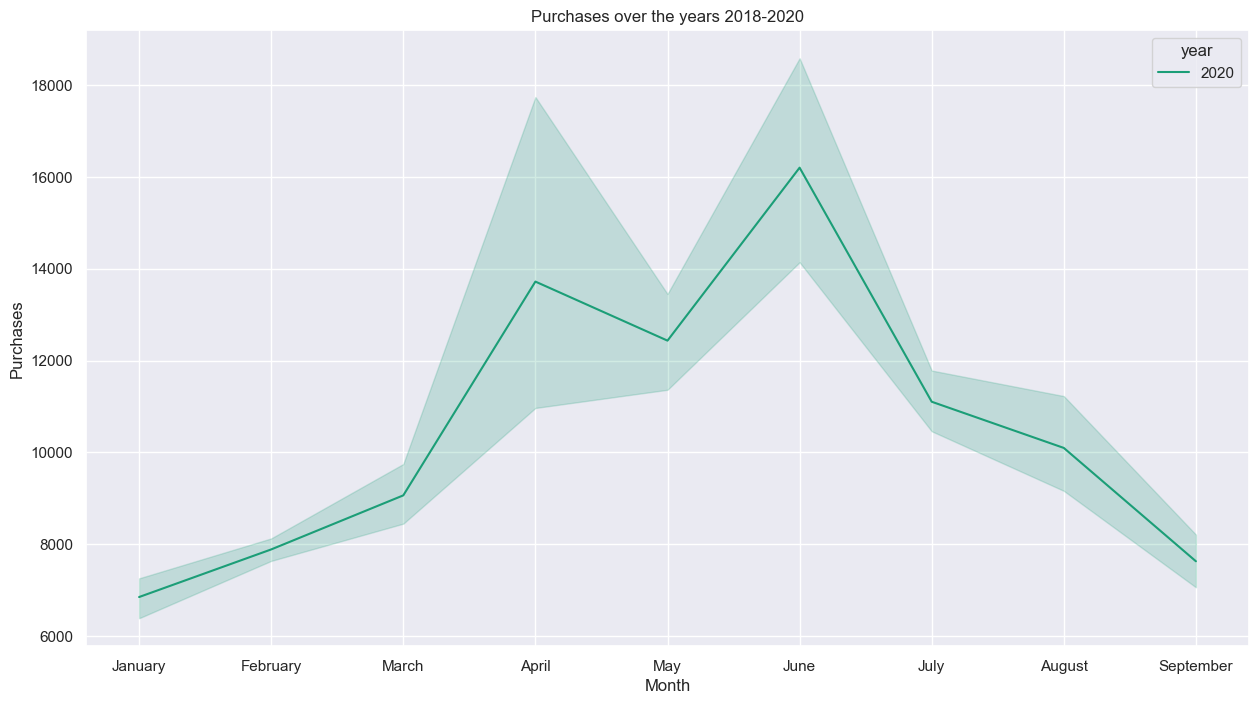

In [ ]:
sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2").set(title='Purchases over the years 2018-2020')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20468\4190322193.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  pt2.sort_index(1,inplace=True)


[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

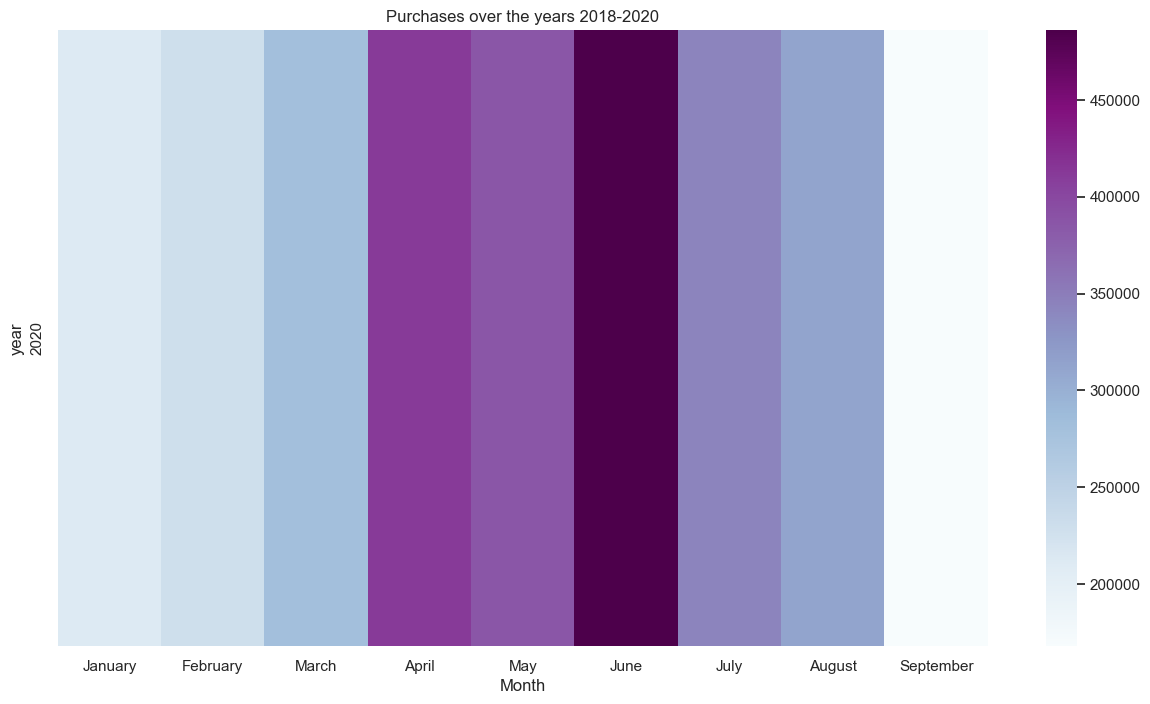

In [ ]:
pt2 = y_original.pivot_table(index="year",columns="Month",values="Purchases", aggfunc="sum").fillna(0)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

pt2.columns = pd.CategoricalIndex(pt2.columns,categories=months)
pt2.sort_index(1,inplace=True)
sns.heatmap(pt2, cmap="BuPu").set(title='Purchases over the years 2018-2020')

In [ ]:
y = x['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y["Period"] = pd.to_datetime(y["date"])
y = y.set_index("Period")
y["year"] = y.index.year
y["Month"] = y.index.month_name()
y["month_number"] = y.index.month
y.head()

,date,Purchases,year,Month,month_number
Period,,,,,
2020-04-11,2020-04-11,60311,2020,April,4
2020-06-17,2020-06-17,36172,2020,June,6
2020-06-24,2020-06-24,29016,2020,June,6
2020-04-04,2020-04-04,28291,2020,April,4
2020-06-18,2020-06-18,25078,2020,June,6


[Text(0.5, 1.0, 'Bar graph for Purchases from January to September (2020)')]

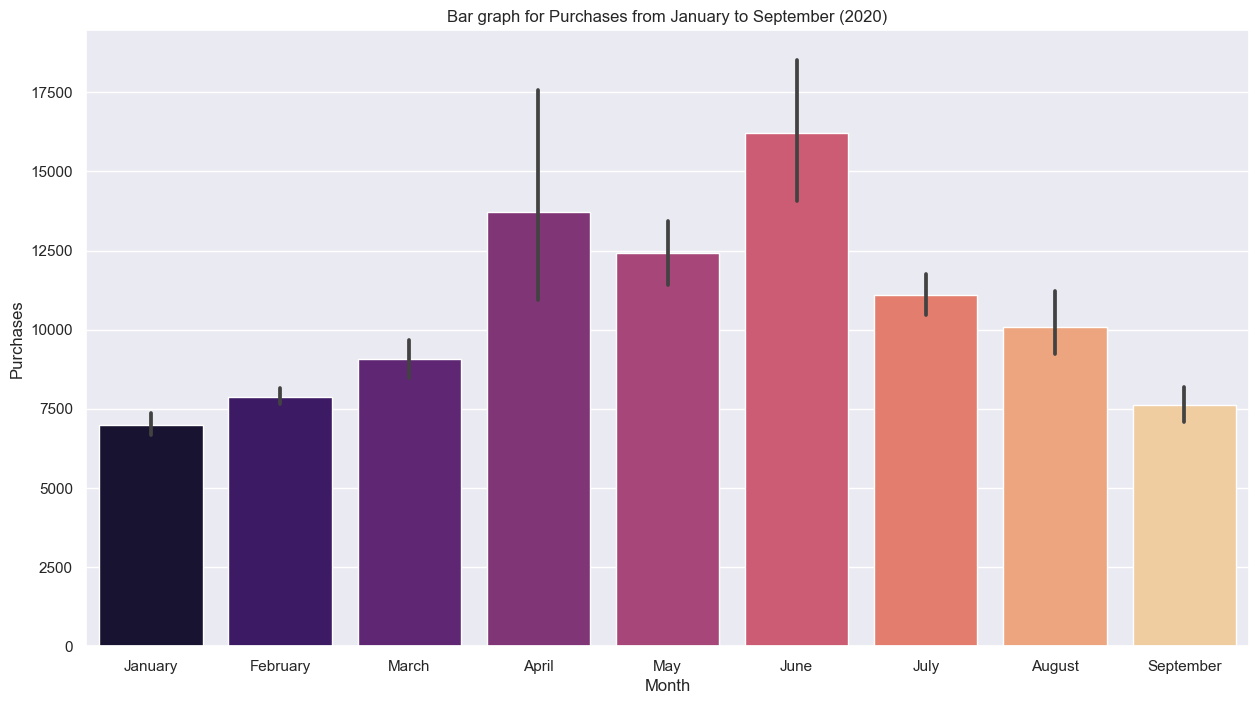

In [ ]:
### barplot for sampled dataset (9 months)
y = y.sort_values('month_number')
sns.barplot(x = 'Month', y='Purchases', data = y,  palette = 'magma').set(title='Bar graph for Purchases from January to September (2020)')

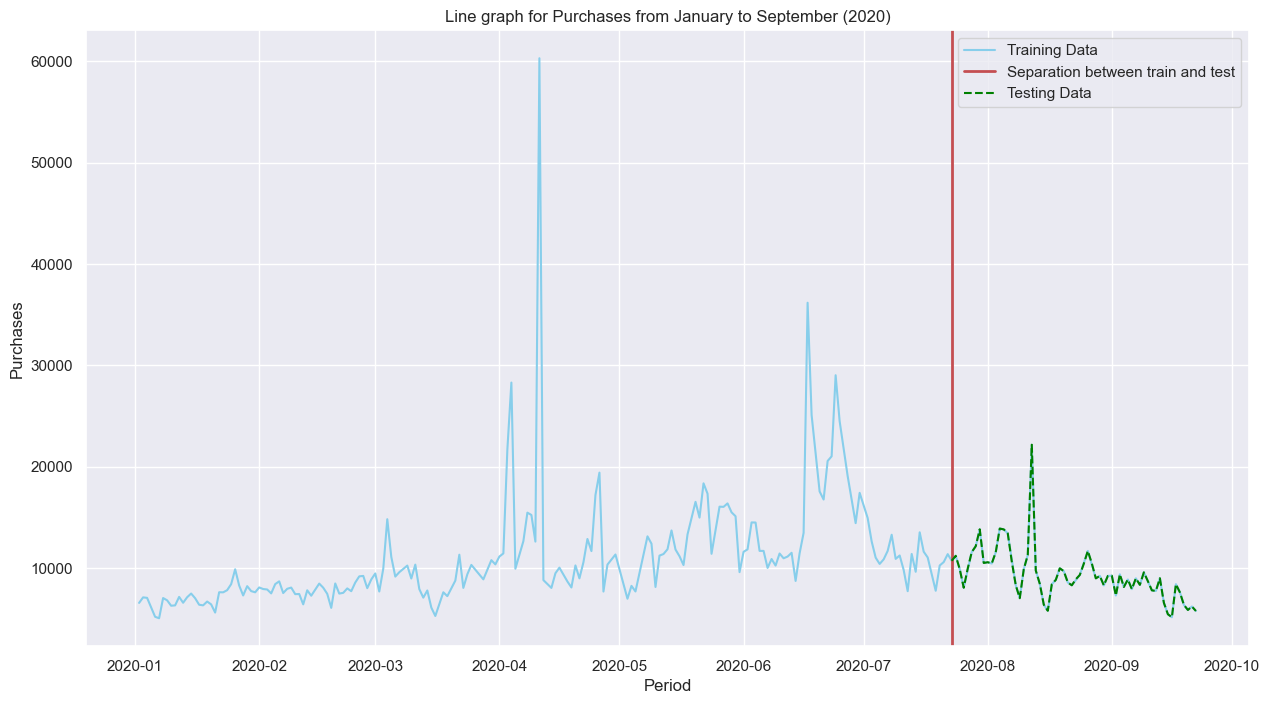

In [ ]:
sns.lineplot(x="Period", y="Purchases", data=y, color='skyblue', label="Training Data") # plot normal time series plot
# plot subset on top of the normal time series
plt.axvline(pd.to_datetime('2020-07-23'), color='r', lw=2, label="Separation between train and test")

g=sns.lineplot(x="Period",y="Purchases",data=y[(y['date'] >= '2020-07-23') & (y['date'] <= '2020-09-22')], linestyle="dashed", color='green', label="Testing Data").set(title='Line graph for Purchases from January to September (2020)')

In [ ]:
### training dataset : train_x
### testing dataset : test_x
### validation dataset : val_x

In [ ]:
# Instantiate reader the same convention as a sklearn class
reader = Reader(rating_scale = (0,1))
# Load user_data from imported dataframe specifiyng which columns to use
#customer_data = Dataset.load_from_df(transactions[['customer_id', 'article_id', 'pop_factor']], reader)

In [ ]:
trainset1 = Dataset.load_from_df(train_x[['customer_id', 'article_id', 'pop_factor']], reader)


In [ ]:
testset1 = Dataset.load_from_df(test_x[['customer_id', 'article_id', 'pop_factor']], reader)

In [ ]:
type(trainset1)

surprise.dataset.DatasetAutoFolds

In [ ]:
type(testset1)

surprise.dataset.DatasetAutoFolds

In [ ]:
# Perform an appropriate split for the recommendation models
trainset, testset2 = train_test_split(trainset1, test_size=0.1, random_state=42)

In [ ]:
testset3, testset = train_test_split(testset1, test_size=0.1, random_state=42)

In [ ]:
#How many users and items are in the trainset
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  79182 

Number of items:  5555 



In [ ]:
#How many users and items are in the testset
print('Number of users: ', testset3.n_users, '\n')
print('Number of items: ', testset3.n_items, '\n')

Number of users:  57566 

Number of items:  5590 



## Modeling

### Baselines without cross validation

In [ ]:
from collections import defaultdict

 

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est,true_r))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Instantiate and fit model
baseline = NormalPredictor()
baseline.fit(trainset)

# Return test predictions for model fit on trainset
predictions = baseline.test(testset)

# Save RMSE score to variable
baseline_normal = accuracy.rmse(predictions)

RMSE: 0.0069


In [ ]:
top_n = get_top_n(predictions, n=10)
top_n

defaultdict(list,
            {'97722c5aa61b2181f596040db1df43034cf0aba4207fb173d8e78a5b4707a57f': [(863646001,
               0.009216026293603748,
               0.009615384615384616),
              (861469002, 0.007234933826163763, 0.009615384615384616)],
             'c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003146338597a39a51009': [(933032002,
               0.006399803795139895,
               0.009433962264150943)],
             'e5266e66b4f6e9315edb95795fb23b476a2efe88dac7e979083d3a84af2044cf': [(915529005,
               0.008957858790674313,
               0.009174311926605505),
              (890511001, 0.0078999546122622, 0.006622516556291391),
              (874754002, 0, 0.008264462809917356)],
             'dfabb58db7992448164016a66a95028ba073e3165697e0230333782339c7782e': [(864415001,
               0.005434075415367408,
               0.007407407407407408)],
             'a6092d5bda31e7eb6f0f79d5119bfadd754cd4005982f96f3c68461ef3593f0f': [(717490081,
               0

In [ ]:
predictions

[Prediction(uid='97722c5aa61b2181f596040db1df43034cf0aba4207fb173d8e78a5b4707a57f', iid=863646001, r_ui=0.009615384615384616, est=0.009216026293603748, details={'was_impossible': False}),
 Prediction(uid='c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003146338597a39a51009', iid=933032002, r_ui=0.009433962264150943, est=0.006399803795139895, details={'was_impossible': False}),
 Prediction(uid='e5266e66b4f6e9315edb95795fb23b476a2efe88dac7e979083d3a84af2044cf', iid=874754002, r_ui=0.008264462809917356, est=0, details={'was_impossible': False}),
 Prediction(uid='dfabb58db7992448164016a66a95028ba073e3165697e0230333782339c7782e', iid=864415001, r_ui=0.007407407407407408, est=0.005434075415367408, details={'was_impossible': False}),
 Prediction(uid='a6092d5bda31e7eb6f0f79d5119bfadd754cd4005982f96f3c68461ef3593f0f', iid=717490008, r_ui=0.009174311926605505, est=0.0047302394022317226, details={'was_impossible': False}),
 Prediction(uid='51a7163ebf517f66c7cac84aebc4362a77480aa357651332e0abd6f93245d

In [ ]:
predictions_dF = pd.DataFrame(predictions)

In [ ]:

predictionTop10 =predictions_dF.groupby(['uid', 'est']).head(5).reset_index(drop=True)

 

In [ ]:
predictionTop10.uid[1]

'c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003146338597a39a51009'

In [ ]:
predictionTop10.head(2)

,uid,iid,r_ui,est,details
0,97722c5aa61b2181f596040db1df43034cf0aba4207fb1...,863646001,0.009615,0.009216,{'was_impossible': False}
1,c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003...,933032002,0.009434,0.006400,{'was_impossible': False}


In [ ]:
!pip install recmetrics --user


  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
     ------------------------------------ 188.5/188.5 kB 814.1 kB/s eta 0:00:00
     ------------------------------------ 237.5/237.5 kB 808.8 kB/s eta 0:00:00
     -------------------------------------- 54.5/54.5 kB 471.1 kB/s eta 0:00:00
     -------------------------------------- 51.1/51.1 kB 648.1 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import recmetrics

In [ ]:
print("MSE: ", recmetrics.mse(predictionTop10.r_ui, predictionTop10.est))
print("RMSE: ", recmetrics.rmse(predictionTop10.r_ui, predictionTop10.est))
  

MSE:  4.793157653383087e-05
RMSE:  0.006923263430913984


In [ ]:
#predictionTop10 = predictionTop10.set_index("uid")
predictionTop10.head(10)

,uid,iid,r_ui,est,details
0,97722c5aa61b2181f596040db1df43034cf0aba4207fb1...,863646001,0.009615,0.009216,{'was_impossible': False}
1,c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003...,933032002,0.009434,0.006400,{'was_impossible': False}
2,e5266e66b4f6e9315edb95795fb23b476a2efe88dac7e9...,874754002,0.008264,0.000000,{'was_impossible': False}
3,dfabb58db7992448164016a66a95028ba073e3165697e0...,864415001,0.007407,0.005434,{'was_impossible': False}
4,a6092d5bda31e7eb6f0f79d5119bfadd754cd4005982f9...,717490008,0.009174,0.004730,{'was_impossible': False}
5,51a7163ebf517f66c7cac84aebc4362a77480aa3576513...,811899003,0.006993,0.007240,{'was_impossible': False}
6,609b83f19f990b8f59568d02132117a7ea23e548a55178...,891636002,0.006250,0.002905,{'was_impossible': False}
7,7e92703548cc50a87bbb2a263719e4f91489910d6ab1c8...,874891003,0.010000,0.002892,{'was_impossible': False}
8,0bb73fe5665eac7332e41de08c432ba9743e97b90c26b6...,781833008,0.012987,0.005409,{'was_impossible': False}
9,4f87d704f19950321715b90f5c41bcee9b19a8a6c4f31f...,715624052,0.008197,0.000000,{'was_impossible': False}


In [ ]:
#create model (matrix of predicted values)
cf_model = predictionTop10.pivot_table( index='uid' ,columns=['iid'], values='est').fillna(0)

 

In [ ]:
cf_model.head(10)

iid,111565001,111586001,111593001,123173001,129085001,148033001,153115019,153115020,153115021,153115040,156231001,158340001,160442007,160442010,160442043,179208001,179950001,179950002,179950017,186262001,186262006,189616001,189616006,189626001,212629004,...,930380001,931769003,932243002,932798001,933032001,933032002,933706001,933838001,933838002,933891001,933989001,935689001,935840001,935892001,936282001,936610001,936622001,936862001,937466002,938182001,938804001,941005005,942187001,944506001,946748003
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec5e0fb21b12f862f73d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00077dbd5c4a4991e092e63893ccf29294a9d5c46e85010e95f2fc10bf9437a4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00080403a669b3b89d1bef1ec73ea466d95e39698d6dded141c0e3a8d4599d0c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000da6daeb90ef9a70238bf9b1aa54c7ce40a5e0fcf2207011806ee379bd089b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ed4cabda96069b547ae531c66de5f1bf6a7e5b83aa8ecc5abe84a9f6779e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001d4fed8a933922bc1c97e2881c7d3e76be3d660a8c49cc7aa50ec6d398abc4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd1ff67812cb511ced72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Instantiate and fit model
baseline2 = BaselineOnly()
baseline2.fit(trainset)

# Return test predictions for model fit on trainset
predictions = baseline2.test(testset)

# Save RMSE score to variable
baseline_only = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.0062


### SVD

In [ ]:
svd_model = SVD()
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_simple_predictions = accuracy.rmse(svd_predictions)
svd_simple_predictions

RMSE: 0.0314


0.031443579845685306

In [ ]:
predictions

[Prediction(uid='97722c5aa61b2181f596040db1df43034cf0aba4207fb173d8e78a5b4707a57f', iid=863646001, r_ui=0.009615384615384616, est=0.004819151628805215, details={'was_impossible': False}),
 Prediction(uid='c0a24902a3e931a13ba32ab7d851232961f33b5f4b3003146338597a39a51009', iid=933032002, r_ui=0.009433962264150943, est=0.005646167936847957, details={'was_impossible': False}),
 Prediction(uid='e5266e66b4f6e9315edb95795fb23b476a2efe88dac7e979083d3a84af2044cf', iid=874754002, r_ui=0.008264462809917356, est=0.00499737979043226, details={'was_impossible': False}),
 Prediction(uid='dfabb58db7992448164016a66a95028ba073e3165697e0230333782339c7782e', iid=864415001, r_ui=0.007407407407407408, est=0.004772060549899944, details={'was_impossible': False}),
 Prediction(uid='a6092d5bda31e7eb6f0f79d5119bfadd754cd4005982f96f3c68461ef3593f0f', iid=717490008, r_ui=0.009174311926605505, est=0.004285415493840861, details={'was_impossible': False}),
 Prediction(uid='51a7163ebf517f66c7cac84aebc4362a77480aa35765

In [ ]:
svd_model.predict('0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2', 824499001)

Prediction(uid='0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2', iid=824499001, r_ui=None, est=0.004691407536571932, details={'was_impossible': False})

In [ ]:
transactions.loc[(transactions['customer_id'] == '7e92703548cc50a87bbb2a263719e4f91489910d6ab1c8f64fc2f7eb8a1df4ce') & 
                 (transactions['article_id'] == 824499001)]

,t_dat,customer_id,article_id,pop_factor
21344204,2020-01-16,7e92703548cc50a87bbb2a263719e4f91489910d6ab1c8...,824499001,0.002857


In [ ]:
param_grid = {'n_factors':[10,50],'n_epochs': [5, 15], 'lr_all': [0.002,0.01],
             'reg_all': [0.2,0.6]}
gs_model_SVD1 = GridSearchCV(SVD,param_grid=param_grid,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD1.fit(trainset1)

gs_model_SVD1.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-2)]: Done  80 out of  80 | elapsed: 13.3min finished


{'rmse': {'n_factors': 10, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.6}}

explain

In [ ]:
param_grid2 = {'n_factors':[5,10],'n_epochs': [15, 50], 'lr_all': [0.001, 0.01],
             'reg_all': [0.6, 0.8]}
gs_model_SVD2 = GridSearchCV(SVD,param_grid=param_grid2,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD2.fit(trainset1)

gs_model_SVD2.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done  66 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-2)]: Done  80 out of  80 | elapsed: 18.4min finished


{'rmse': {'n_factors': 5, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.6}}

explain

In [ ]:
param_grid3 = {'n_factors':[10],'n_epochs': [50, 100], 'lr_all': [0.1, 0.2],
             'reg_all': [0.8, 0.9]}
gs_model_SVD3 = GridSearchCV(SVD,param_grid=param_grid3,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD3.fit(trainset1)

gs_model_SVD3.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed: 18.0min finished


{'rmse': {'n_factors': 10, 'n_epochs': 100, 'lr_all': 0.1, 'reg_all': 0.8}}

In [ ]:
param_grid4 = {'n_factors':[10],'n_epochs': [100, 150], 'lr_all': [0.2, 0.3],
             'reg_all': [0.7, 0.8]}
gs_model_SVD4 = GridSearchCV(SVD,param_grid=param_grid4,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD4.fit(trainset1)

gs_model_SVD4.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-2)]: Done  40 out of  40 | elapsed: 24.2min finished


{'rmse': {'n_factors': 10, 'n_epochs': 100, 'lr_all': 0.2, 'reg_all': 0.7}}

We find the best parameters for SVD modeling are - 
- n_factors : 10
- n_epochs : 100
- lr_all :0.1
- reg_all : 0.8

Now we build a model with the best parameters and test it on our testset.

In [ ]:
svd_model2 = SVD(n_factors= 10, n_epochs= 50)
svd_model2.fit(trainset)
svd_predictions2 = svd_model2.test(testset)
svd_tuned_predictions = accuracy.rmse(svd_predictions2)
svd_tuned_predictions

RMSE: 0.0090


0.008951479913147441

### NFM 

Now, we explore the `Non-negative Matrix Factorization (NMF)` from the `suprise` library. The only difference between this algorithm and the previous algorithm SVD is that in NMF, a specific step size is set for the stochastic gradient descent process of regularization. This is done to ensure that all user and item factors are kept positive. While this model can be prone to over-fitting, this can be mitigated with steps to reduce the dimensionality of our data/factors.

In [ ]:
nmf_model = NMF()
nmf_model.fit(trainset)
nmf_predictions = nmf_model.test(testset)
nmf_simple_predictions = accuracy.rmse(nmf_predictions)
nmf_simple_predictions

RMSE: 0.0095


0.009466703673588841

In [ ]:
param_grid = {'n_factors':[10,15,20],'n_epochs': [25, 50, 75]}
gs_model_NFM = GridSearchCV(NMF,param_grid=param_grid,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_NFM.fit(trainset1)

gs_model_NFM.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed: 23.1min finished


{'rmse': {'n_factors': 10, 'n_epochs': 25}}

explain

In [ ]:
param_grid = {'n_factors':[10],'n_epochs': [75, 100]}
gs_model_NFM2 = GridSearchCV(NMF,param_grid=param_grid,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_NFM2.fit(trainset1)

gs_model_NFM2.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:  6.2min remaining:  1.5min
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:  8.1min finished


{'rmse': {'n_factors': 10, 'n_epochs': 75}}

Explain

We find the best parameters for NMF modeling are - 
- n_factors : 10
- n_epochs : 75

Now we build a model with the best parameters and test it on our testset.

In [ ]:
nmf_model2 = NMF(n_factors = 10, n_epochs = 75)
nmf_model2.fit(trainset)
nmf_predictions2 = nmf_model2.test(testset)
nmf_tuned_predictions = accuracy.rmse(nmf_predictions2)

nmf_tuned_predictions

RMSE: 0.0095


0.009466703673588841

## SVD ++ 

For a final look at models from the `surprise` library, I wanted to try and utilize the SVD++ algorithm, again, very similar to SVD. The difference is that SVD++ attempts to add an extension onto the base SVD that uses implicit rating as well as explicit. In other words it infers the action of rating an item as a latent factor regardless of the rating value given to the item while also factoring the actual rating value. I thought this might further improve the RMSE by taking into account reviewers who have rated a large number of eBooks. Please note that this Grid Search will take a very long time to run.

In [ ]:
# Instantiate - fit on trainset - score the model on testset
SVDpp_model = SVDpp()
SVDpp_model.fit(trainset)
SVDpp_predictions = SVDpp_model.test(testset)
svdpp_simple_predictions = accuracy.rmse(SVDpp_predictions)

svdpp_simple_predictions

RMSE: 0.0133


0.013265999100896243

In [ ]:
# New dictionary for SVD++
svdpp_param_grid = {'n_factors':[1, 5], 'n_epochs':[25, 50], 'reg_all':[0.02, 0.05]}
svdpp_gs_model = GridSearchCV(SVDpp, param_grid=svdpp_param_grid, cv=3, joblib_verbose=5, n_jobs=-2, measures=['RMSE'])

# Fit and return the best_params based on cross validation this will take a VERY long time to run
svdpp_gs_model.fit(trainset1)

svdpp_gs_model.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-2)]: Done  24 out of  24 | elapsed: 17.1min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  24 out of  24 | elapsed: 17.1min finished


{'rmse': {'n_factors': 1, 'n_epochs': 50, 'reg_all': 0.05}}

explain

In [ ]:
# New dictionary for SVD++
svdpp_param_grid2 = {'n_factors':[1], 'n_epochs':[50, 100], 'reg_all':[0.05, 0.1]}
svdpp_gs_model2 = GridSearchCV(SVDpp, param_grid=svdpp_param_grid2, cv=3, joblib_verbose=5, n_jobs=-2, measures=['RMSE'])

# Fit and return the best_params based on cross validation this will take a VERY long time to run
svdpp_gs_model2.fit(trainset1)

svdpp_gs_model2.best_params

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  12 | elapsed: 10.2min remaining:  2.0min
[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed: 10.4min finished


{'rmse': {'n_factors': 1, 'n_epochs': 50, 'reg_all': 0.1}}

We find the best parameters for SVD ++ modeling are - 
- n_factors : 1
- n_epochs : 50
- reg_all : 0.1

Now we build a model with the best parameters and test it on our testset.

In [ ]:
# Instantiate - fit on trainset - score the model on testset
SVDpp_model2 = SVDpp(n_factors=1, n_epochs=50, reg_all=0.1)
SVDpp_model2.fit(trainset)
SVDpp_predictions2 = SVDpp_model2.test(testset)
svdpp_tuned_predictions = accuracy.rmse(SVDpp_predictions2)

svdpp_tuned_predictions

RMSE: 0.0062


0.006206368046370133

## Model Performance

In [ ]:
# # just to code ahead! 
baseline_only = 0.0062
svd_simple_predictions =  0.0314

svd_tuned_predictions = 0.0090

nmf_simple_predictions = 0.0095

nmf_tuned_predictions = 0.0095
svdpp_simple_predictions = 0.0133
svdpp_tuned_predictions = 0.0062

In [ ]:
X = ['Baseline', 'SVD Basic', 'SVD Tuned', 'NMF Basic', 'NMF tuned', 'SVD ++ Basic', 'SVD ++ Tuned']
y = [baseline_only, svd_simple_predictions, svd_tuned_predictions, nmf_simple_predictions, nmf_tuned_predictions, svdpp_simple_predictions, svdpp_tuned_predictions]

Text(0, 0.5, 'Root Mean Squared Error (RMSE)')

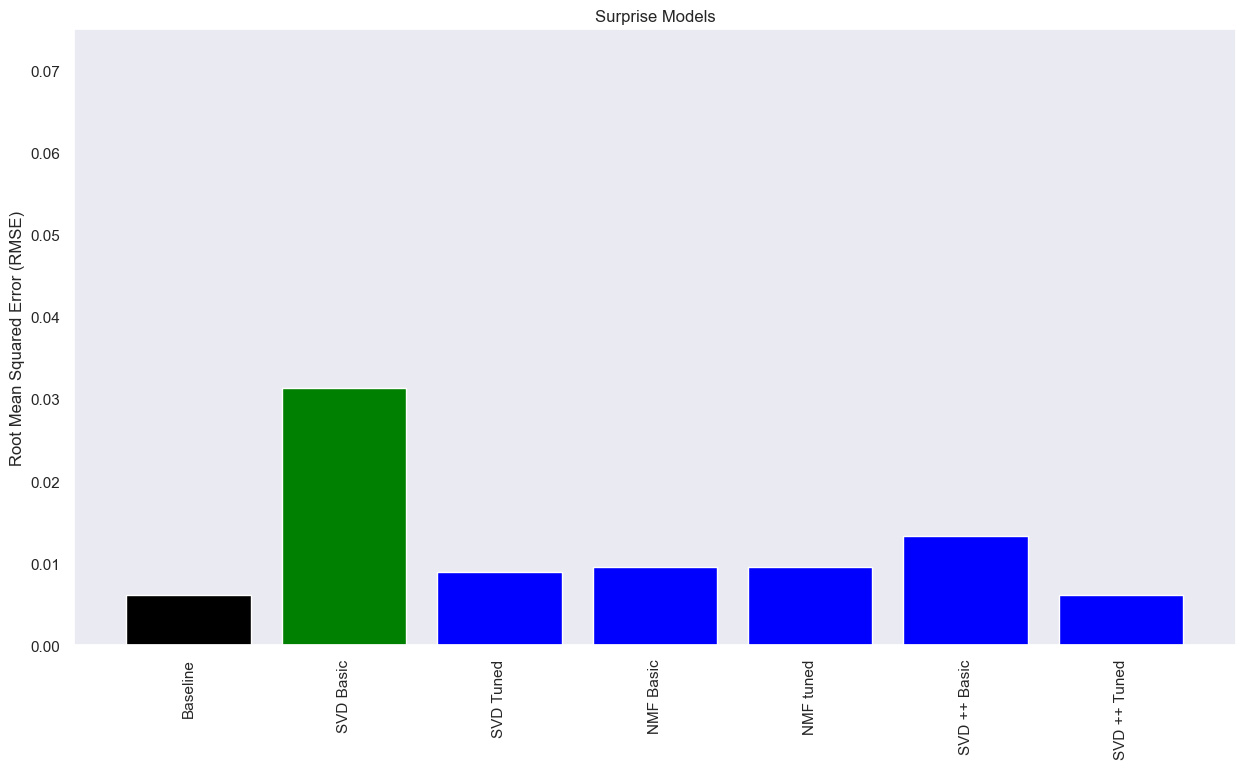

In [ ]:
fig, ax = plt.subplots()
plt.bar(X, y, color=['black', 'green', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xticks(rotation=90)
plt.ylim(0, .075)
plt.grid(False)
ax.set_title("Surprise Models")
plt.ylabel('Root Mean Squared Error (RMSE)')
 

# Recommendation Function

### Building

##### Final Model

In [ ]:
reader = Reader(rating_scale = (0,1))
# Load user_data from imported dataframe specifiyng which columns to use
customer_data = Dataset.load_from_df(x[['customer_id', 'article_id','pop_factor']], reader)

In [ ]:
# Using Surprise a full trainset incorporating all data can be built and fit to the model in order to make full predictions
trainset_full = customer_data.build_full_trainset()

In [ ]:
#SVD Tunned is best!!
final_model = SVDpp(n_factors=1, n_epochs=50, reg_all=0.1)
final_model.fit(trainset_full)

In [ ]:
# The model is pickled and saved into the Model folder in the repository so it can used in the app.py file
#pickle.dump(final_model, open('Model/collaborative_model.sav', 'wb'))

In [ ]:
#collab_model = pickle.load(open('Model/collaborative_model.sav', 'rb'))

In [ ]:
x.tail(10)

,t_dat,customer_id,article_id,pop_factor
31788266,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,886566001,0.01
31788303,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273002,0.01
31788305,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273001,0.01
31788306,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,919273004,0.01
31788310,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,896169005,0.01
31788314,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,701472004,0.01
31788317,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.01
31788318,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.01
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.01
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.01


In [ ]:
final_model

Start from here... 
- we have to load the articles df here as meta data with article id as the index 
- build function

In [ ]:
# Load in the meta data for use in returning the details about the recommended articles 
meta_articles = pd.read_csv('articles.csv', index_col='article_id')
meta_articles.head(3)

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,,,,
108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
# sanity check
meta_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   index                         105542 non-null  int64 
 1   article_id                    105542 non-null  int64 
 2   product_code                  105542 non-null  int64 
 3   prod_name                     105542 non-null  object
 4   product_type_no               105542 non-null  int64 
 5   product_type_name             105542 non-null  object
 6   product_group_name            105542 non-null  object
 7   graphical_appearance_no       105542 non-null  int64 
 8   graphical_appearance_name     105542 non-null  object
 9   colour_group_code             105542 non-null  int64 
 10  colour_group_name             105542 non-null  object
 11  perceived_colour_value_id     105542 non-null  int64 
 12  perceived_colour_value_name   105542 non-null  object
 13 

In [ ]:
x.head()

,t_dat,customer_id,article_id,pop_factor
20820963,2020-01-02,001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd...,719655001,0.002747
20820999,2020-01-02,0071a08839ee650528afe22a7bff79334a09eed3edf67b...,797088002,0.002747
20821007,2020-01-02,00940f3cc6e6ab97cfefa71b2bd479a5c0dbccf5b56f7a...,784001001,0.002747
20821008,2020-01-02,00940f3cc6e6ab97cfefa71b2bd479a5c0dbccf5b56f7a...,784001002,0.002747
20821029,2020-01-02,00c257cc1f3f38cacf81e563bceb084dac6fd7a238b19e...,828982001,0.002747


In [ ]:
# The transactions data is subset to just show customers and the articles they have bought
df_customer = x.set_index('customer_id')
df_customer.drop(columns=[  't_dat' ], inplace=True)
df_customer.tail()

,article_id,pop_factor
customer_id,,
ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac55b4c6fb955cc836b1,701472004,0.01
ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac55b4c6fb955cc836b1,902288001,0.01
ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac55b4c6fb955cc836b1,856440002,0.01
fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,891322004,0.01
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e02ce5d1e58a8f700b,898573003,0.01


In [ ]:
# Save the `df_customer` as a new csv

#df_customer.to_csv('Data/df_customer.csv')

In [ ]:
#pd.read_csv('Data/df_customer.csv', index_col='customer_id')
#df_customer.head(10)

In [ ]:
user = input('CustomerID: ')
have_bought = list(df_customer.loc[customer, 'article_id'])


not_bought = meta_articles.copy()
not_bought. .drop(have_bought, inplace=True)
not_bought.reset_index(inplace=True)


CustomerID: 0071a08839ee650528afe22a7bff79334a09eed3edf67b152bd4132c7c73b028


In [ ]:
customer_bought_count = x[['customer_id', 'article_id']].groupby('customer_id')['article_id'].nunique().reset_index().rename(columns={'article_id': 'count'})
select_customers = customer_bought_count[customer_bought_count['count']<10] 

In [ ]:
 select_customers['customer_id'].values
    
 

array(['0001177027259b455f979d85a278e4b280205d4de5cce4bb83ccbb8d5dbb4b92',
       '000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060ccf17ba290e00c5d85',
       '004eba6e5f4705ea033b34f454b43524e41eb3d5c63923870c9845fb0c960706',
       ...,
       'ffbc3ce4b0fae2de39ce955ea3fdb619eb8da7411d778cb38594fe739a7d7453',
       'ffedd10bbc166ed253113951a1c028389064df97a48198d6d377166da51fa7c4',
       'ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b3228600897e4fad2eaa90'],
      dtype=object)

## Function

In [ ]:
def customer_article_recommend():
    
    user = input('CustomerID: ')
    n_recs = int(input('How many recommendations? '))
    
    have_bought = list(df_customer.loc[user, 'article_id'])
 
   # user = input('CustomerID: ')
    #n_recs = int(input('How many recommendations? '))
    
     
    bought = meta_articles.copy()
    bought['article_id']=bought.index  
    bought=bought[bought['article_id'].isin(have_bought)]
# Dropping indexes (article_id) that correspond to already bought articles
 # Reset index to pull out article_id as a seperate column
#bought.reset_index(inplace=True)
    bought_indexName=bought[['index_name','product_group_name','index_group_name','garment_group_name']].drop_duplicates()
    
    not_bought = meta_articles.copy()
    not_bought.drop(have_bought, inplace=True)
    not_bought['article_id']=not_bought.index  
 
    not_bought1=pd.merge(not_bought,bought_indexName
                     ,how='inner',on=['index_name','product_group_name','index_group_name','garment_group_name' ])
    not_bought1.reset_index(inplace=True)
    not_bought1['est_purchase'] = not_bought1['article_id'].apply(lambda x: final_model.predict(customer, x).est)
    not_bought1.sort_values(by='est_purchase', ascending=False, inplace=True)
    
    not_bought2 = not_bought1.groupby(["index_name","product_group_name","index_group_name","garment_group_name"])
    df3= not_bought2.apply(lambda x: x.sort_values(["est_purchase"], ascending = False)).reset_index(drop=True)
    df3=df3.groupby(["index_name","product_group_name","index_group_name","garment_group_name"]).head(2)
    df3.iloc[:100, :]
    df3 = df3.sample(frac=1).reset_index(drop=True)
    not_bought5=df3[['article_id','prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name']]
    return not_bought5.sort_values(by=["index_name","product_group_name","index_group_name","garment_group_name"], ascending = False).head(n_recs)

In [ ]:
not_bought1.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,est_purchase
0,901330002,901330,Zola boot,87,Boots,Shoes,1010026,Other structure,9,Black,4,Dark,5,Black,3529,Boots,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Ankle boots in imitation leather with covered ...,0.008280
1,898886001,898886,Joyce high shaft,87,Boots,Shoes,1010001,All over pattern,9,Black,4,Dark,5,Black,3529,Boots,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Boots in crocodile-patterned imitation leather...,0.008509
2,884319002,884319,Lucien CONSCIOUS,258,Blouse,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1522,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Blouse in an airy weave with a stand-up collar...,0.009059
3,930380001,930380,Ruccola,258,Blouse,Garment Upper body,1010001,All over pattern,31,Light Orange,1,Dusty Light,3,Orange,1522,Blouse,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1010,Blouses,Slightly longer blouse in an airy weave with a...,0.009163
4,888570001,888570,Calypso push body,283,Underwear body,Underwear,1010021,Lace,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Body in lace and mesh with a push-up bra. Unde...,0.008148


In [ ]:
df3= not_bought2.apply(lambda x: x.sort_values(["est_purchase"], ascending = False)).reset_index(drop=True)
 
df3.groupby(["index_name","product_group_name","index_group_name","garment_group_name"]).head(2)


,index,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_id,est_purchase
0,6594,349301,GLASSIG ESPADRILLE,86,Ballerinas,Shoes,1010016,Solid,33,Dark Orange,5,Bright,3,Orange,3527,Flats,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Espadrilles in cotton with a braided jute trim...,6594,0.005116
1,7711,734179,OL BELWAL PQ wedge,95,Wedge,Shoes,1010016,Solid,32,Orange,5,Bright,3,Orange,3040,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Platform sandals in suede with a braided jute ...,7711,0.005116
2024,9067,721589,Tortoise dress,265,Dress,Garment Full body,1010016,Solid,9,Black,4,Dark,5,Black,1666,Jersey,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1005,Jersey Fancy,"One-shoulder, knee-length dress in softly drap...",9067,0.005116
2025,9364,790216,hockey bodycon,265,Dress,Garment Full body,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Long, fitted dress in heavily draping, ribbed ...",9364,0.005116
3307,1264,919499,ELVIS JOGGER,272,Trousers,Garment Lower body,1010016,Solid,8,Dark Grey,4,Dark,-1,Unknown,1660,Jersey,A,Ladieswear,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,Joggers in sweatshirt fabric with an elasticat...,1264,0.005116
3308,770,654263,Leyla pants,272,Trousers,Garment Lower body,1010010,Melange,8,Dark Grey,4,Dark,12,Grey,2032,Jersey,A,Ladieswear,1,Ladieswear,8,Mama,1005,Jersey Fancy,"Marled joggers in a soft, fine-knit viscose bl...",770,0.005116
4040,6568,931769,ED Madison Skinny HW,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1939,Woven bottoms,A,Ladieswear,1,Ladieswear,2,H&M+,1009,Trousers,"5-pocket jeans in washed, stretch cotton denim...",6568,0.005116
4041,4078,519914,Kanta slacks,272,Trousers,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,1722,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Trousers in woven fabric with one welt back po...,4078,0.005116
6685,1650,551194,Sonette Bow,252,Sweater,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,2034,Knitwear,A,Ladieswear,1,Ladieswear,8,Mama,1003,Knitwear,"Jumper in a soft, fine knit containing some wo...",1650,0.005116
6686,2610,700828,Sienna,252,Sweater,Garment Upper body,1010016,Solid,73,Dark Blue,2,Medium Dusty,2,Blue,1626,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Oversized jumper in a rib knit containing some...,2610,0.005116


In [ ]:
have_bought = list(df_customer.loc['004eba6e5f4705ea033b34f454b43524e41eb3d5c63923870c9845fb0c960706', 'article_id'])
 
bought = meta_articles.copy()
bought['article_id']=bought.index  
bought=bought[bought['article_id'].isin(have_bought)]
bought=bought[['prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name']]
bought.sort_values(by=["index_name","product_group_name","index_group_name","garment_group_name"], ascending = False).head(20)

#bought[['index_name','product_group_name','index_group_name','garment_group_name']].drop_duplicates().reset_index(drop=True)

,prod_name,product_type_name,product_group_name,index_name,index_group_name,garment_group_name
article_id,,,,,,
372860002,7p Basic Shaftless,Socks,Socks & Tights,Lingeries/Tights,Ladieswear,Socks and Tights
372860024,Basic 7p Shaftless,Socks,Socks & Tights,Lingeries/Tights,Ladieswear,Socks and Tights
875856001,HM+ House,Sweater,Garment Upper body,Ladieswear,Ladieswear,Knitwear
797892001,ED Primo slacks,Trousers,Garment Lower body,Ladieswear,Ladieswear,Trousers
815471001,SPORT Heaven shape HW tights,Leggings/Tights,Garment Lower body,Ladieswear,Ladieswear,Jersey Fancy
294008002,HM+ Cora tee,Costumes,Garment Full body,Ladieswear,Ladieswear,Jersey Fancy
294008005,HM+ Cora tee,Costumes,Garment Full body,Ladieswear,Ladieswear,Jersey Fancy
808028006,Marian sandalette,Heeled sandals,Shoes,Ladies Accessories,Ladieswear,Shoes
808028008,Marian sandalette,Heeled sandals,Shoes,Ladies Accessories,Ladieswear,Shoes


,index,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_id,est_purchase
0,6594,349301,GLASSIG ESPADRILLE,86,Ballerinas,Shoes,1010016,Solid,33,Dark Orange,5,Bright,3,Orange,3527,Flats,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Espadrilles in cotton with a braided jute trim...,6594,0.005116
2024,9067,721589,Tortoise dress,265,Dress,Garment Full body,1010016,Solid,9,Black,4,Dark,5,Black,1666,Jersey,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1005,Jersey Fancy,"One-shoulder, knee-length dress in softly drap...",9067,0.005116
9316,0,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",0,0.005116


In [ ]:
user = input('CustomerID: ')

have_bought = list(df_customer.loc[user, 'article_id'].unique())
have_bought
# Creating new dataframe from meta data to subset based on already bought articles
bought = meta_articles.copy()
bought['article_id']=bought.index  
bought=bought[bought['article_id'].isin(have_bought)]
# Dropping indexes (article_id) that correspond to already bought articles
 # Reset index to pull out article_id as a seperate column
#bought.reset_index(inplace=True)
bought_indexName=list(bought['index_name'].unique())
bought_indexName

CustomerID: ffbc3ce4b0fae2de39ce955ea3fdb619eb8da7411d778cb38594fe739a7d7453


['Lingeries/Tights', 'Divided', 'Ladieswear', 'Ladies Accessories']

In [ ]:
bought1=bought[['prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name']]
bought1.sort_values(by='index_name').head(20)

,prod_name,product_type_name,product_group_name,index_name,index_group_name,garment_group_name
article_id,,,,,,
816588001,Bongo LS,Top,Garment Upper body,Divided,Divided,Jersey Fancy
816588006,Bongo LS,Top,Garment Upper body,Divided,Divided,Jersey Fancy
878079001,Morris elastic waist,Belt,Accessories,Ladies Accessories,Ladieswear,Accessories
857571001,SF PI Stef short dress,Dress,Garment Full body,Ladieswear,Ladieswear,Special Offers
858052001,Verina,Blouse,Garment Upper body,Ladieswear,Ladieswear,Blouses
868517001,SF PI Stef long dress,Dress,Garment Full body,Ladieswear,Ladieswear,Special Offers
742982003,Lyon Highw Brazilian x-cheeky,Swimwear bottom,Swimwear,Lingeries/Tights,Ladieswear,Swimwear
832309005,Hamilton Swimsuit,Swimsuit,Swimwear,Lingeries/Tights,Ladieswear,Swimwear
864716001,C Lolly Unpadded Swimsuit,Swimsuit,Swimwear,Lingeries/Tights,Ladieswear,Swimwear


## Evaluation 
 

In [ ]:
example = customer_article_recommend()

example
#

CustomerID: 004eba6e5f4705ea033b34f454b43524e41eb3d5c63923870c9845fb0c960706
How many recommendations? 20


,article_id,prod_name,product_type_name,product_group_name,index_name,index_group_name,garment_group_name
0,240561001,Support 70 den 1p Tights,Underwear Tights,Socks & Tights,Lingeries/Tights,Ladieswear,Socks and Tights
4,807244002,1p Short Socks,Socks,Socks & Tights,Lingeries/Tights,Ladieswear,Socks and Tights
2,903926002,Columbo Dress,Top,Garment Upper body,Ladieswear,Ladieswear,Knitwear
3,924243002,Ohlsson,Sweater,Garment Upper body,Ladieswear,Ladieswear,Knitwear
5,929275001,Hudson PU wide leg,Trousers,Garment Lower body,Ladieswear,Ladieswear,Trousers
6,928907001,Tree HW PU,Trousers,Garment Lower body,Ladieswear,Ladieswear,Trousers
8,928040002,Bahamas trousers,Trousers,Garment Lower body,Ladieswear,Ladieswear,Jersey Fancy
11,918892001,Puma leggings,Leggings/Tights,Garment Lower body,Ladieswear,Ladieswear,Jersey Fancy
9,900279001,HM+ Tina dress,Dress,Garment Full body,Ladieswear,Ladieswear,Jersey Fancy
10,912095007,Manchego dress,Dress,Garment Full body,Ladieswear,Ladieswear,Jersey Fancy


# example customer '004eba6e5f4705ea033b34f454b43524e41eb3d5c63923870c9845fb0c960706' Brought

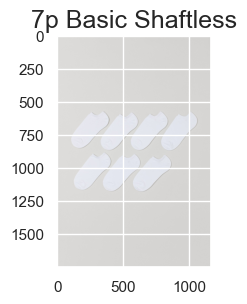

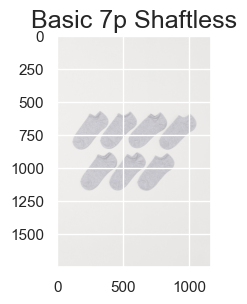

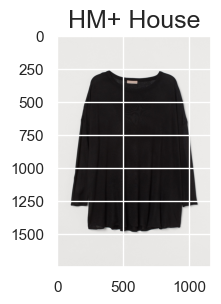

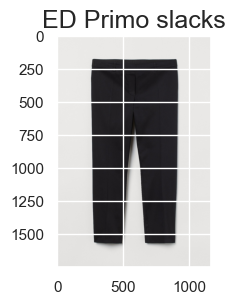

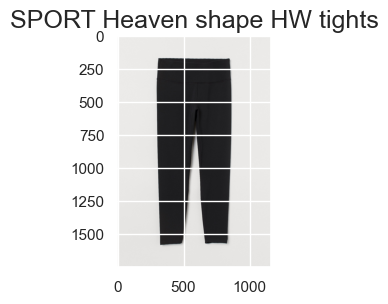

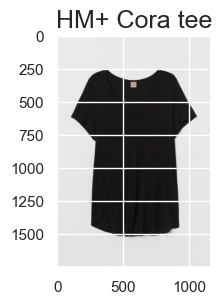

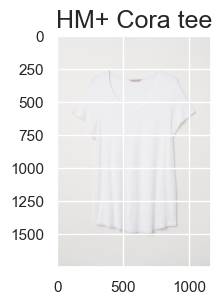

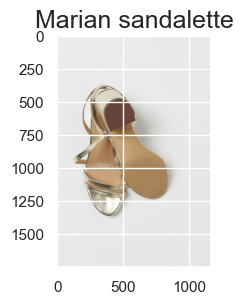

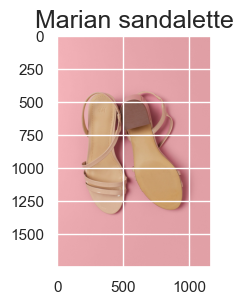

In [ ]:
# Let's check the last purchases by max price and by min price

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
bought1= bought[['prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name','article_id']].drop_duplicates()
max_price_ids =  bought1.sort_values(by=["index_name","product_group_name","index_group_name","garment_group_name"], ascending = False).head(20)

#transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
 

# Photos with description and price (top 5 max)
 



# Photos with description and price (top 5 max)
i = 0
 
    
for  _, data in max_price_ids.iterrows():
   
        
     
        plt.figure(figsize=(20,3))
 
        img1 =  mpimg.imread(f'F:/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
        desc = max_price_ids[max_price_ids['article_id'] == data['article_id']]['prod_name'].iloc[0]
        plt.title(desc,size=18)
        plt.imshow(img1)
       

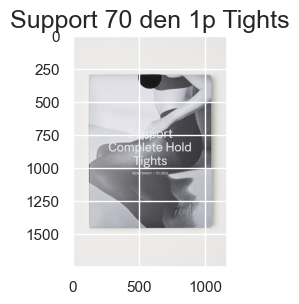

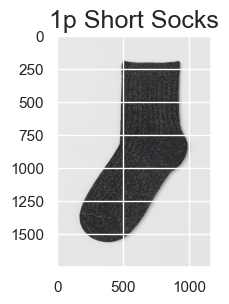

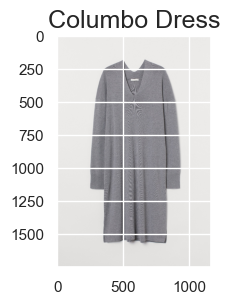

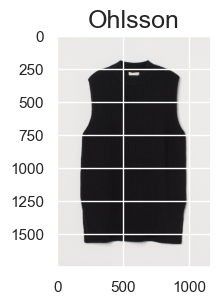

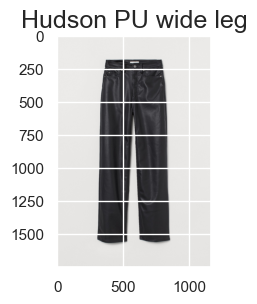

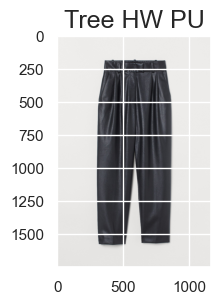

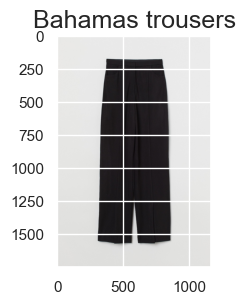

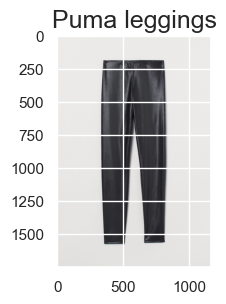

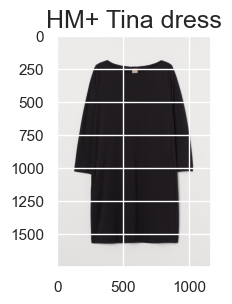

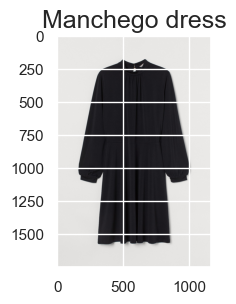

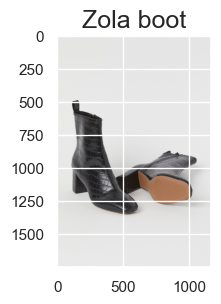

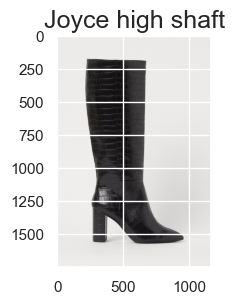

In [ ]:
# Let's check the last purchases by max price and by min price

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


have_bought = list(df_customer.loc['004eba6e5f4705ea033b34f454b43524e41eb3d5c63923870c9845fb0c960706', 'article_id'])

     
bought = meta_articles.copy()
bought['article_id']=bought.index  
bought=bought[bought['article_id'].isin(have_bought)]
# Dropping indexes (article_id) that correspond to already bought articles
 # Reset index to pull out article_id as a seperate column
#bought.reset_index(inplace=True)
bought_indexName=bought[['index_name','product_group_name','index_group_name','garment_group_name']].drop_duplicates()
    
not_bought = meta_articles.copy()
not_bought.drop(have_bought, inplace=True)
not_bought['article_id']=not_bought.index  
     
not_bought1=pd.merge(not_bought,bought_indexName
                     ,how='inner',on=['index_name','product_group_name','index_group_name','garment_group_name' ])
not_bought1.reset_index(inplace=True)
not_bought1['est_purchase'] = not_bought1['article_id'].apply(lambda x: final_model.predict(customer, x).est)
not_bought1.sort_values(by='est_purchase', ascending=False, inplace=True)
    
not_bought2 = not_bought1.groupby(["index_name","product_group_name","index_group_name","garment_group_name"])
df3= not_bought2.apply(lambda x: x.sort_values(["est_purchase"], ascending = False)).reset_index(drop=True)
df3=df3.groupby(["index_name","product_group_name","index_group_name","garment_group_name"]).head(2)
df3.iloc[:100, :]
df3 = df3.sample(frac=1).reset_index(drop=True)
 


not_bought1= df3[['prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name','article_id']].drop_duplicates()
max_price_ids =  not_bought1.sort_values(by=["index_name","product_group_name","index_group_name","garment_group_name"], ascending = False).head(20)


 
#transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]
 
# Photos with description and price (top 5 max)
i = 0
 
    
for  _, data in max_price_ids.iterrows():
   
        
     
        plt.figure(figsize=(20,3))
   
 
        img1 =  mpimg.imread(f'F:/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
        
                  
        desc = max_price_ids[max_price_ids['article_id'] == data['article_id']]['prod_name'].iloc[0]
        plt.title(desc,size=18)
        plt.imshow(img1)
       
 

In [ ]:
not_bought2=not_bought1[['prod_name', 'product_type_name', 'product_group_name', 'index_name', 'index_group_name',
        'garment_group_name']]
not_bought2.sort_values(by='index_name').head(20)

,prod_name,product_type_name,product_group_name,index_name,index_group_name,garment_group_name
0,Zola boot,Boots,Shoes,Ladies Accessories,Ladieswear,Shoes
1,Joyce high shaft,Boots,Shoes,Ladies Accessories,Ladieswear,Shoes
6,Strindberg boot,Boots,Shoes,Ladies Accessories,Ladieswear,Shoes
2,Lucien CONSCIOUS,Blouse,Garment Upper body,Ladieswear,Ladieswear,Blouses
3,Ruccola,Blouse,Garment Upper body,Ladieswear,Ladieswear,Blouses
7,Hudson PU wide leg,Trousers,Garment Lower body,Ladieswear,Ladieswear,Trousers
4,Calypso push body,Underwear body,Underwear,Lingeries/Tights,Ladieswear,"Under-, Nightwear"
5,Birdie LL PJ (J),Pyjama set,Nightwear,Lingeries/Tights,Ladieswear,"Under-, Nightwear"
8,Calypso C&S push bralette,Bra,Underwear,Lingeries/Tights,Ladieswear,"Under-, Nightwear"
